In [1]:
import os
import sys
import argparse
from pathlib import Path
import argparse
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

In [2]:


FILE = Path().resolve()
ROOT = FILE.parents[0]  # root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative


# Importing the model
A small yolo models is stored in the folder 'models/'. Add the path to torch.hub to load the model 

In [3]:
import torch 


pathmodel ='models/Holo/small/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=pathmodel)

Using cache found in C:\Users\adm.rscherrer/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-8-20 torch 1.7.0+cu110 CUDA:0 (GeForce RTX 2060 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7086274 parameters, 0 gradients
Adding AutoShape... 


# load a testing image


In [5]:
path = 'Images/Holo/test/'
pathImg = os.path.join(path,'images','im1.png')
pathLab = os.path.join(path,'labels','im1.txt')

I = np.array(Image.open(pathImg))


Predict the labels on the Image 

In [7]:
results = model(I)
preds = results.xyxy[0].cpu().detach().numpy()
bbox = preds[:,:4] # xyxy format 
cls = preds[:,-1] # class id 



In [8]:
%matplotlib inline

# Show the results 


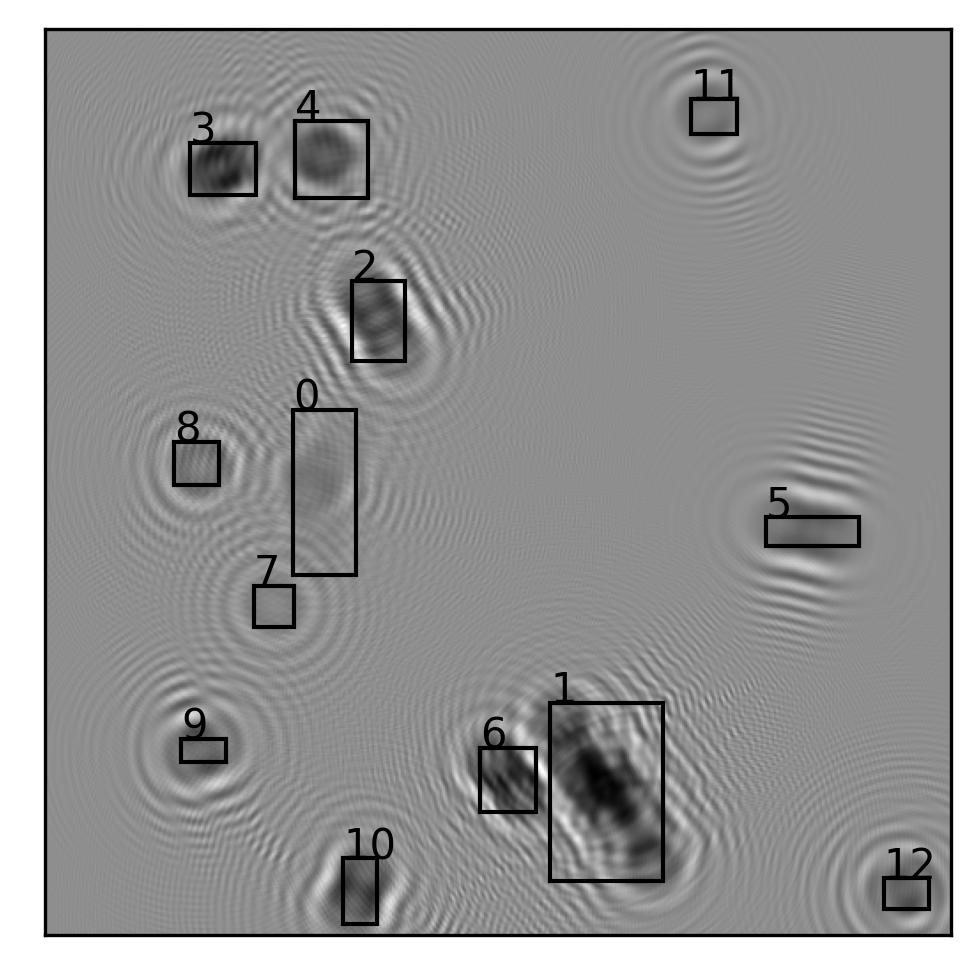

In [13]:
from HoloTrack.utils.plots import plotbboxFormat         
        
plotbboxFormat(I[:,:,1],bbox,format='xyxy',classes=cls,color='k')

Load the true labels from the label folder and convert the bounding boxes to xyxy format

In [10]:
import pandas as pd
from HoloTrack.utils.detection import xywhn_xyxy_box

lab = pd.read_csv(pathLab,sep=' ',header = None)

trueBBox = xywhn_xyxy_box(lab.values[:,1:-1],I.shape[0]) 
trueCls = lab.values[:,0]

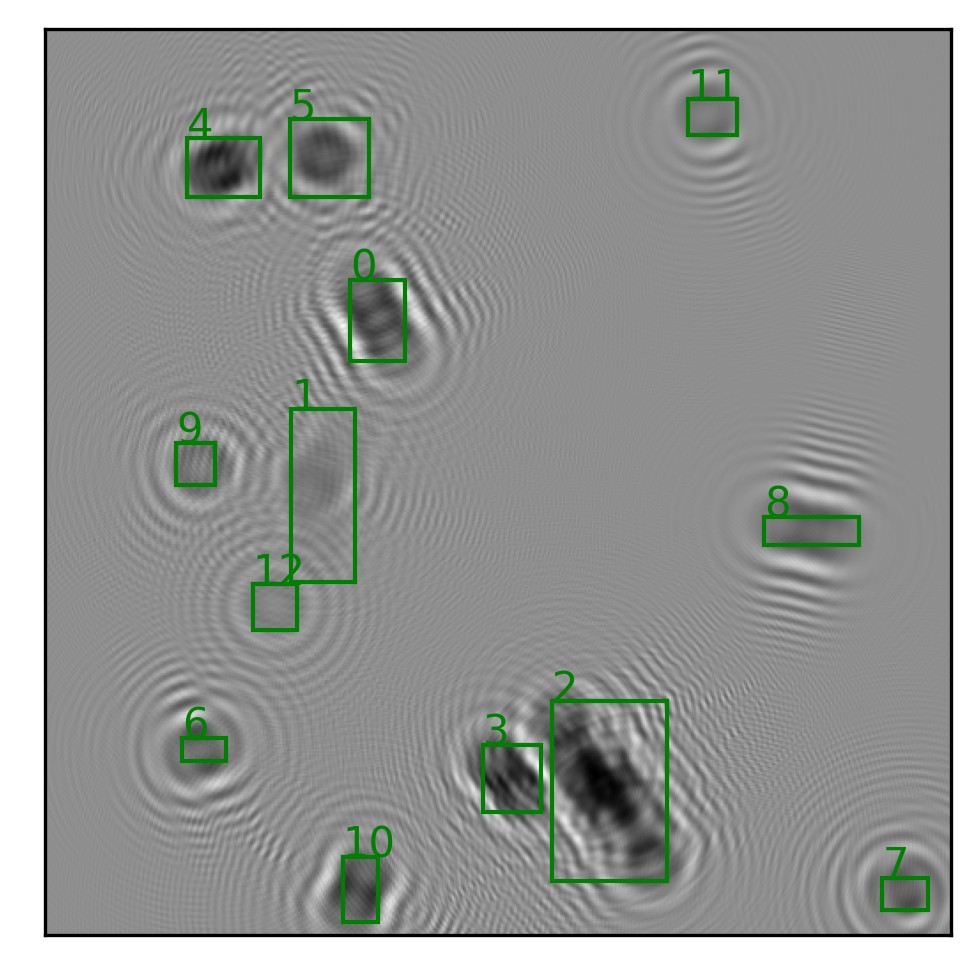

In [14]:
plotbboxFormat(I[:,:,1],trueBBox,format='xyxy',classes=cls,color='g')

Compare the True bbox (green) with the predictions (red). 

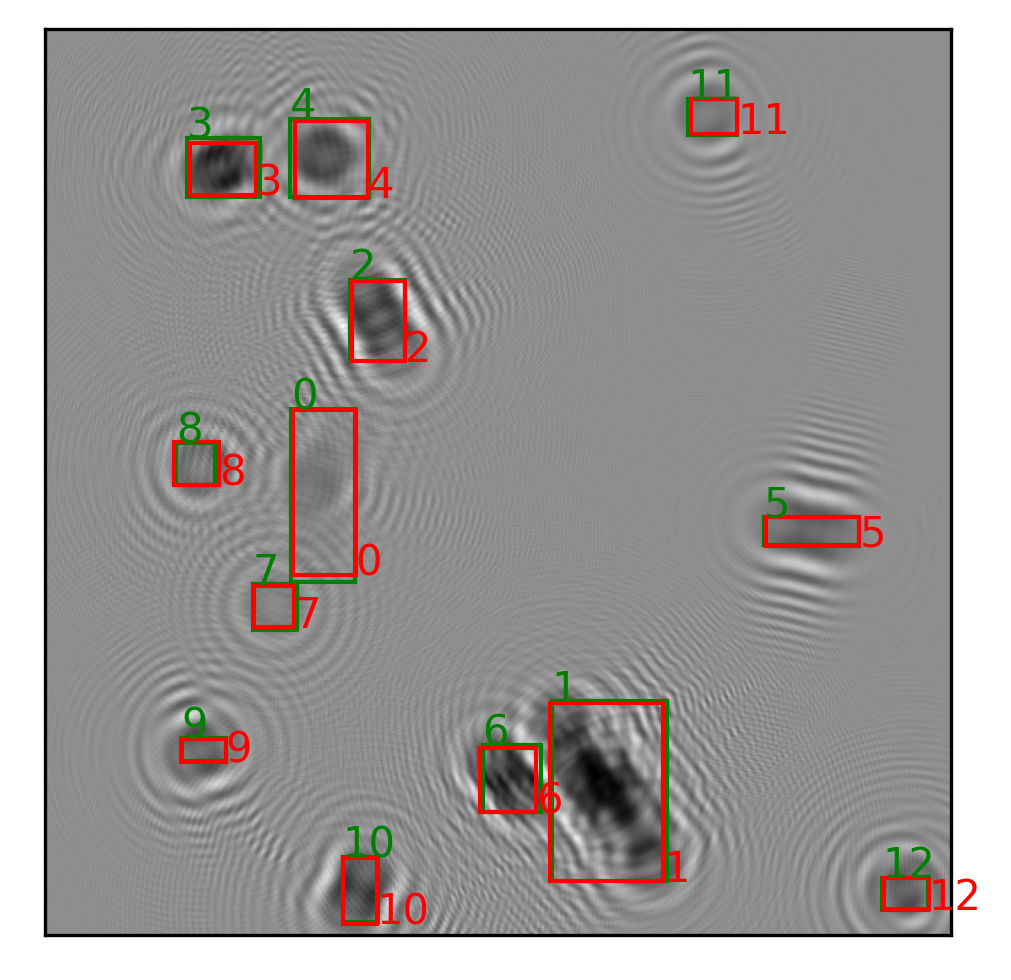

In [15]:
from HoloTrack.utils.plots import plotPredGT    
plotPredGT(I[:,:,1],trueBBox,trueCls,bbox,cls)
